## 1.Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


## 2.Visualize the first 200 training images

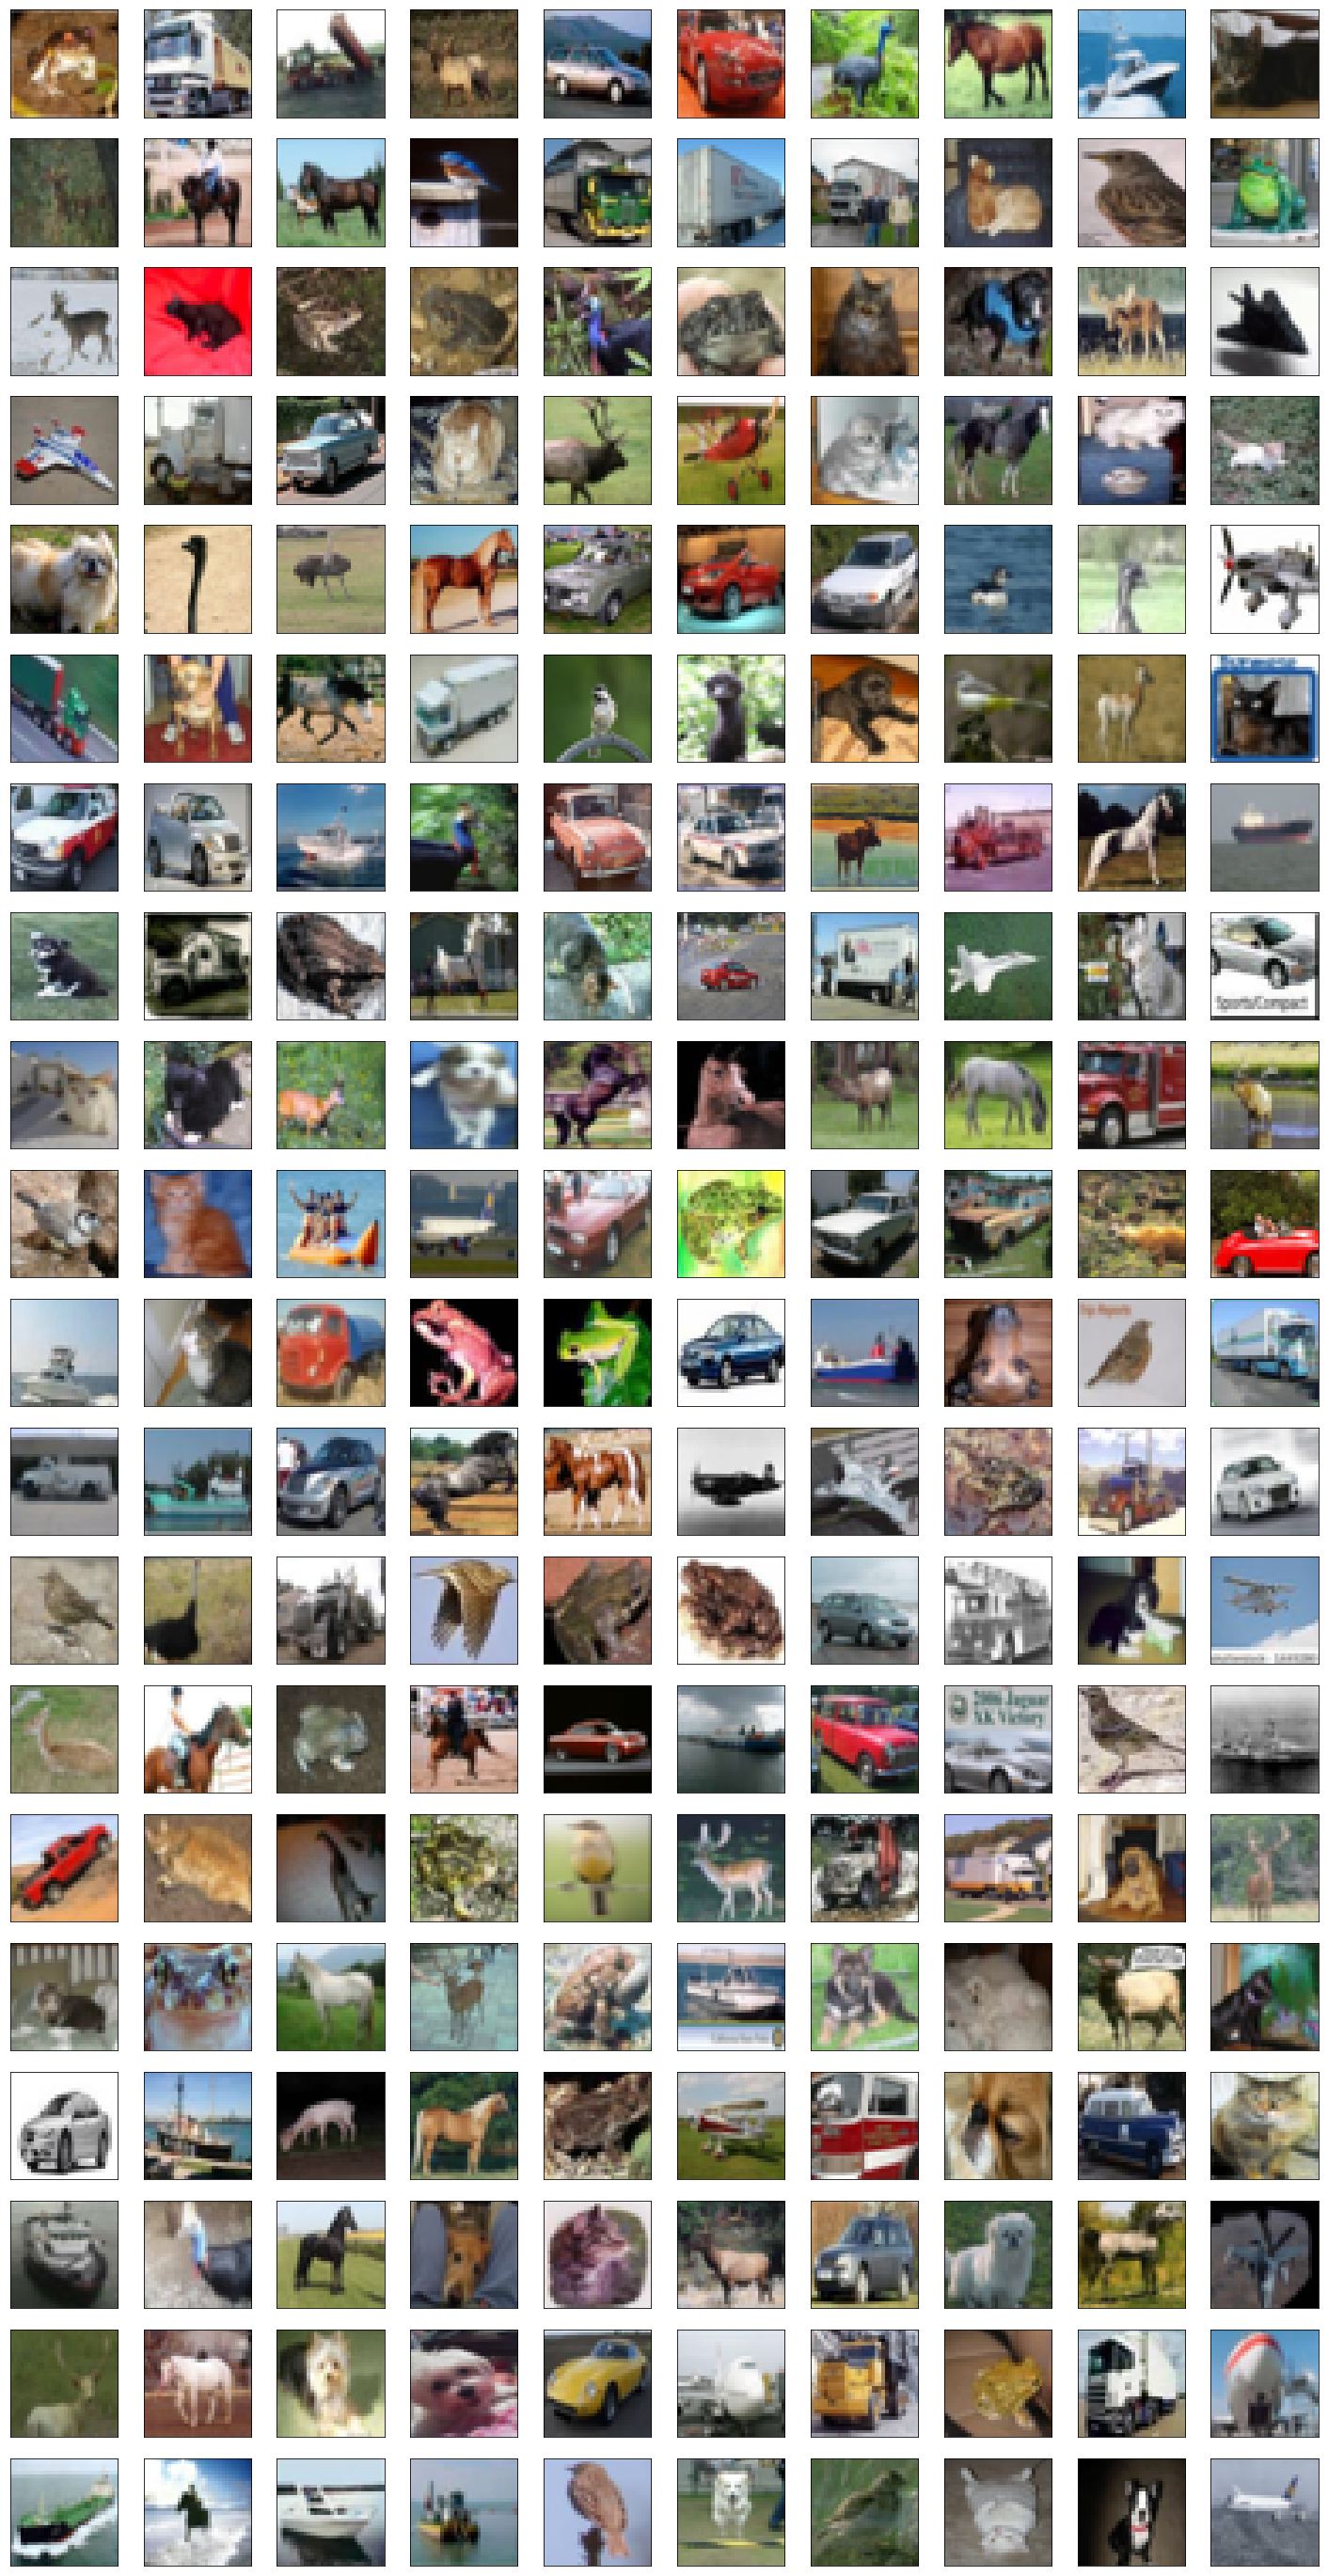

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure(figsize=(25,50))
for i in range(200):
    image = fig.add_subplot(20,10,i+1,xticks=[],yticks=[])
    image.imshow(np.squeeze(x_train[i]))

## 3.Rescaling the images

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4.One hot encoding the labels

In [4]:
for i in range(5):
    print(y_train[i])

[6]
[9]
[9]
[4]
[1]


In [5]:
from keras.utils import to_categorical
number_of_labels = len(np.unique(y_train))
y_train = to_categorical(y_train,num_classes=number_of_labels)
y_test = to_categorical(y_test,num_classes=number_of_labels)
for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## 5.Break datasets into training, testing and validation sets

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [7]:
x_valid=x_train[:5000]
x_train=x_train[5000:]
y_valid=y_train[:5000]
y_train=y_train[5000:]

In [8]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(45000, 32, 32, 3)
(10000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 10)
(10000, 10)
(5000, 10)


## 6.Define the model architecture

In [9]:
x_train.shape[1:]

(32, 32, 3)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, AveragePooling2D
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(500, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)  

## 7.Compile the model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## 8.Train the model

In [12]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = 'weightsCNN.best.hdf5', verbose = 1, save_best_only = True)
history = model.fit(x_train,y_train, epochs=30, batch_size=100, verbose=1,callbacks=[checkpoint], validation_data=(x_valid,y_valid), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 167s 4ms/step - loss: 1.7770 - acc: 0.3532 - val_loss: 1.4973 - val_acc: 0.4620

Epoch 00001: val_loss improved from inf to 1.49731, saving model to weightsCNN.best.hdf5
Epoch 2/30
45000/45000 [==============================] - 134s 3ms/step - loss: 1.4414 - acc: 0.4814 - val_loss: 1.3115 - val_acc: 0.5440

Epoch 00002: val_loss improved from 1.49731 to 1.31153, saving model to weightsCNN.best.hdf5
Epoch 3/30
45000/45000 [==============================] - 117s 3ms/step - loss: 1.2878 - acc: 0.5363 - val_loss: 1.1738 - val_acc: 0.5770

Epoch 00003: val_loss improved from 1.31153 to 1.17383, saving model to weightsCNN.best.hdf5
Epoch 4/30
45000/45000 [==============================] - 75s 2ms/step - loss: 1.1830 - acc: 0.5777 - val_loss: 1.0738 - val_acc: 0.6176

Epoch 00004: val_loss improved from 1.17383 to 1.07383, saving model to w

## 9.Load the model weights that yielded best validation accuracy

In [13]:
model.load_weights('weightsCNN.best.hdf5')

## 10.Evaluate model classification accuracy on test set

In [14]:
score= model.evaluate(x_test,y_test,verbose=0)
print(model.metrics_names)
print(score)
accuracy=100*score[1]

['loss', 'acc']
[0.7809759585380555, 0.7386]


In [15]:
print('Test accuracy:',accuracy)

Test accuracy: 73.86
